Importing Libraries - pandas, numpy, seaborn and matplotlib 

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Importing Dataset

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


Importing time series Dataset - US Confirmed Cases 

In [ ]:
corona_dataset_csv = pd.read_csv("/content/drive/My Drive/UST/time_series_covid19_confirmed_US.csv")
corona_dataset_csv.head()

,UID,iso2,iso3,code3,FIPS,Admin2,Province_State,Country_Region,Lat,Long_,Combined_Key,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,...,6/10/20,6/11/20,6/12/20,6/13/20,6/14/20,6/15/20,6/16/20,6/17/20,6/18/20,6/19/20,6/20/20,6/21/20,6/22/20,6/23/20,6/24/20,6/25/20,6/26/20,6/27/20,6/28/20,6/29/20,6/30/20,7/1/20,7/2/20,7/3/20,7/4/20,7/5/20,7/6/20,7/7/20,7/8/20,7/9/20,7/10/20,7/11/20,7/12/20,7/13/20,7/14/20,7/15/20,7/16/20,7/17/20,7/18/20,7/19/20
0,16,AS,ASM,16,60.0,NaN,American Samoa,US,-14.271000,-170.132000,"American Samoa, US",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,316,GU,GUM,316,66.0,NaN,Guam,US,13.444300,144.793700,"Guam, US",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,180,183,183,183,183,185,186,188,192,200,222,222,222,225,226,231,247,247,247,253,257,267,280,280,280,280,301,303,307,309,310,310,310,312,312,313,314,314,314,314
2,580,MP,MNP,580,69.0,NaN,Northern Mariana Islands,US,15.097900,145.673900,"Northern Mariana Islands, US",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,30,30,30,30,30,30,30,30,30,30,30,30,30,30,30,30,30,30,30,30,30,30,31,31,31,31,31,31,31,31,31,33,33,33,36,36,37,37,37,37
3,63072001,PR,PRI,630,72001.0,Adjuntas,Puerto Rico,US,18.180117,-66.754367,"Adjuntas, Puerto Rico, US",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,38,38,39,38,38,38,38,38,40,40,43,43,43,43,43,43,43,43,47,48,50,50,50,50,50,52,58,59,59,60,61,63,63,66,66,66,66,67,68,72
4,63072003,PR,PRI,630,72003.0,Aguada,Puerto Rico,US,18.360255,-67.175131,"Aguada, Puerto Rico, US",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,27,27,27,28,28,28,28,28,28,29,29,29,29,30,30,32,32,33,34,34,34,35,36,36,37,37,48,48,48,50,50,52,54,57,58,60,60,66,67,70


Removing Useless Coloumns from the dataset 

In [ ]:
df = corona_dataset_csv.drop(["UID", "iso2", "iso3", "code3", "FIPS", "Admin2", "Lat", "Long_"],axis=1)

Grouping the Dataset with only one coloumn as it consist of (city, state, country)

In [ ]:
corona_dataset_aggregated = df.groupby("Combined_Key").sum()

Visualizing data related to a particular row by plotting graph b/w cities with x-axis as "date" and y-axis as "COVID Cases"


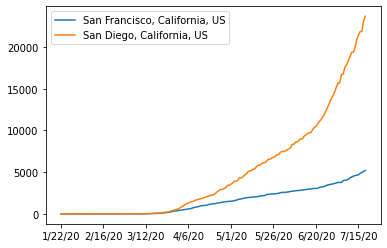

In [ ]:
corona_dataset_aggregated.loc["San Francisco, California, US"].plot()
corona_dataset_aggregated.loc["San Diego, California, US"].plot()
plt.legend()

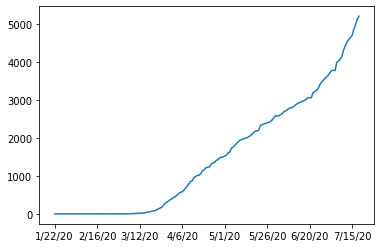

In [ ]:
corona_dataset_aggregated.loc["San Francisco, California, US"].plot()

Calculating and Plotting first derivative of Curve

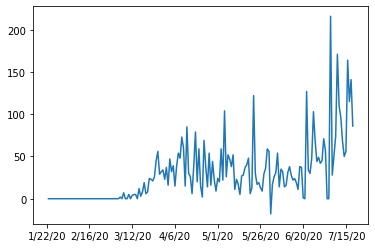

In [ ]:
corona_dataset_aggregated.loc["San Francisco, California, US"].diff().plot()

First derivative of all cities i.e., Max infection rate of all cities

In [ ]:
countries = list(corona_dataset_aggregated.index)
max_infection_rates = []
for c in countries :
  max_infection_rates.append(corona_dataset_aggregated.loc[c].diff().max())
corona_dataset_aggregated["max_infection_rate"] = max_infection_rates

Changing the Data Frame to corona_data

In [ ]:
corona_data = pd.DataFrame(corona_dataset_aggregated["max_infection_rate"])

Maximum infection rate oa all the cities in US

In [ ]:
corona_data.head()

,max_infection_rate
Combined_Key,
"Abbeville, South Carolina, US",13.0
"Acadia, Louisiana, US",96.0
"Accomack, Virginia, US",55.0
"Ada, Idaho, US",325.0
"Adair, Iowa, US",2.0


Importing Another Time Series Dataset - Number of deaths in each city of US

In [ ]:
corona_death_csv = pd.read_csv("/content/drive/My Drive/UST/time_series_covid19_deaths_US.csv")
corona_death_csv.head()

,UID,iso2,iso3,code3,FIPS,Admin2,Province_State,Country_Region,Lat,Long_,Combined_Key,Population,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,...,6/10/20,6/11/20,6/12/20,6/13/20,6/14/20,6/15/20,6/16/20,6/17/20,6/18/20,6/19/20,6/20/20,6/21/20,6/22/20,6/23/20,6/24/20,6/25/20,6/26/20,6/27/20,6/28/20,6/29/20,6/30/20,7/1/20,7/2/20,7/3/20,7/4/20,7/5/20,7/6/20,7/7/20,7/8/20,7/9/20,7/10/20,7/11/20,7/12/20,7/13/20,7/14/20,7/15/20,7/16/20,7/17/20,7/18/20,7/19/20
0,16,AS,ASM,16,60.0,NaN,American Samoa,US,-14.271000,-170.132000,"American Samoa, US",55641,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,316,GU,GUM,316,66.0,NaN,Guam,US,13.444300,144.793700,"Guam, US",164229,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5
2,580,MP,MNP,580,69.0,NaN,Northern Mariana Islands,US,15.097900,145.673900,"Northern Mariana Islands, US",55144,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2
3,63072001,PR,PRI,630,72001.0,Adjuntas,Puerto Rico,US,18.180117,-66.754367,"Adjuntas, Puerto Rico, US",19483,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,63072003,PR,PRI,630,72003.0,Aguada,Puerto Rico,US,18.360255,-67.175131,"Aguada, Puerto Rico, US",41959,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


Removing Uselesss Coloumns

In [ ]:
df1 = corona_death_csv.drop(["UID", "iso2", "iso3", "code3", "FIPS", "Admin2", "Lat", "Long_"],axis=1)

Grouping the Dataset with only one coloumn as it consist of (city, state, country)

In [ ]:
corona_death_aggregated = df1.groupby("Combined_Key").sum()

Calculatinf First Derivative for deaths i.e., Maximum Deaths in each city of US

In [ ]:
countries = list(corona_death_aggregated.index)
max_death_rates = []
for c in countries :
  max_death_rates.append(corona_death_aggregated.loc[c].diff().max())
corona_death_aggregated["max_death_rate"] = max_death_rates

In [ ]:
corona_death = pd.DataFrame(corona_death_aggregated["max_death_rate"])

Maximum Deaths of each city in US

In [ ]:
corona_death.head()

,max_death_rate
Combined_Key,
"Abbeville, South Carolina, US",1.0
"Acadia, Louisiana, US",4.0
"Accomack, Virginia, US",2.0
"Ada, Idaho, US",3.0
"Adair, Iowa, US",0.0


Joining max infection rate and max death rate column

In [ ]:
cases = corona_data.join(corona_death,how="inner")
cases.head()

,max_infection_rate,max_death_rate
Combined_Key,,
"Abbeville, South Carolina, US",13.0,1.0
"Acadia, Louisiana, US",96.0,4.0
"Accomack, Virginia, US",55.0,2.0
"Ada, Idaho, US",325.0,3.0
"Adair, Iowa, US",2.0,0.0


Correlation Matrix b/w max infection rate and max death rate

In [ ]:
cases.corr()

,max_infection_rate,max_death_rate
max_infection_rate,1.000000,0.580936
max_death_rate,0.580936,1.000000


Plotting Scatterplot graph b/w Max Infection rate Vs Max Death Rate to see relation b/w them

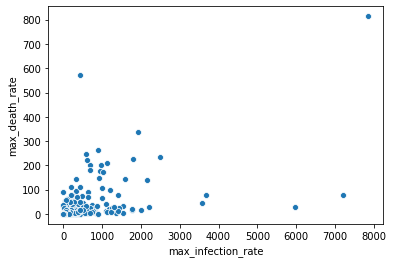

In [ ]:
x = cases["max_infection_rate"]
y = cases["max_death_rate"]
sns.scatterplot(x,y)

Plotting Regplot Graph b/w max infection rate and max death rate

/usr/local/lib/python3.6/dist-packages/pandas/core/series.py:679: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


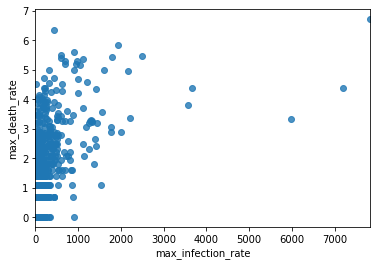

In [ ]:
sns.regplot(x,np.log(y))

Importing hidden markov model library

In [ ]:
!pip install hmmlearn

     |████████████████████████████████| 368kB 2.8MB/s 


In [ ]:
ir=np.array(cases['max_infection_rate'])
dr=np.array(cases['max_death_rate'])
features=np.column_stack((ir,dr))

In [ ]:
from hmmlearn.hmm import GaussianHMM
score_list=[]
hmm=GaussianHMM(n_components=3)
hmm.fit(features)


GaussianHMM(algorithm='viterbi', covariance_type='diag', covars_prior=0.01,
            covars_weight=1, init_params='stmc', means_prior=0, means_weight=0,
            min_covar=0.001, n_components=3, n_iter=10, params='stmc',
            random_state=None, startprob_prior=1.0, tol=0.01,
            transmat_prior=1.0, verbose=False)

In [ ]:
from sklearn.model_selection import train_test_split
train,test = train_test_split(cases, test_size=0.33, shuffle=False)
ir_train=np.array(train['max_infection_rate'])
dr_train=np.array(train['max_death_rate'])
train_features=np.column_stack((ir_train,dr_train))

ir_test=np.array(test['max_infection_rate'])
dr_test=np.array(test['max_death_rate'])
test_features=np.column_stack((ir_test,dr_test))


In [ ]:
from hmmlearn.hmm import GaussianHMM
hm=GaussianHMM(n_components=4)
hm.fit(train_features)

GaussianHMM(algorithm='viterbi', covariance_type='diag', covars_prior=0.01,
            covars_weight=1, init_params='stmc', means_prior=0, means_weight=0,
            min_covar=0.001, n_components=4, n_iter=10, params='stmc',
            random_state=None, startprob_prior=1.0, tol=0.01,
            transmat_prior=1.0, verbose=False)

In [ ]:
n_latency_days=5
day_index=50
previous_data_start_index = max(0, day_index - n_latency_days)
previous_data_end_index = max(0, day_index - 1)
previous_data = test.iloc[previous_data_start_index:previous_data_end_index]

ir_prv=np.array(previous_data['max_infection_rate'])
dr_prv=np.array(previous_data['max_death_rate'])
prv50_features=np.column_stack((ir_prv,dr_prv))


In [ ]:
day_index=100
previous_data_start_index = max(0, day_index - n_latency_days)
previous_data_end_index = max(0, day_index - 1)
previous_data = test.iloc[previous_data_start_index:previous_data_end_index]

ir_prv=np.array(previous_data['max_infection_rate'])
dr_prv=np.array(previous_data['max_death_rate'])
prv100_features=np.column_stack((ir_prv,dr_prv))

In [ ]:
day_index=200
previous_data_start_index = max(0, day_index - n_latency_days)
previous_data_end_index = max(0, day_index - 1)
previous_data = test.iloc[previous_data_start_index:previous_data_end_index]

ir_prv=np.array(previous_data['max_infection_rate'])
dr_prv=np.array(previous_data['max_death_rate'])
prv200_features=np.column_stack((ir_prv,dr_prv))

In [ ]:
outcome_score_50f=hm.score(prv50_features)
prediction_50f=hm.predict_proba(prv50_features)

outcome_score_100f=hm.score(prv100_features)
prediction_100f=hm.predict_proba(prv100_features)

outcome_score_200f=hm.score(prv200_features)
prediction_200f=hm.predict_proba(prv200_features)

In [ ]:
print(outcome_score_50f,outcome_score_100f,outcome_score_200f)

-25.628019187260385 -21.989040922988337 -23.336295593792617


In [ ]:
data = {'First 50 Days':  [outcome_score_50f],
        'First 100 Days': [outcome_score_100f],
         'First 200 Days': [outcome_score_200f]
        }
df_final = pd.DataFrame (data, columns = ['First 50 Days','First 100 Days', 'First 200 Days'])

In [ ]:
df_final

,First 50 Days,First 100 Days,First 200 Days
0,-25.628019,-21.989041,-23.336296
